#Import necessary libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

In [147]:
# Generate a random dataset
X = np.random.randint(10, 50, 100).reshape(20, 5)

In [148]:
# Mean Centering the Data
X_meaned = X - np.mean(X, axis=0)

In [149]:
# Calculate the Covariance Matrix
cov_mat = np.cov(X_meaned, rowvar=False)

In [150]:
# Calculate Eigenvalues and Eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
print("Eigenvalues:\n", eigen_values)
print("Eigenvectors:\n", eigen_vectors)

Eigenvalues:
 [ 37.9938428   77.53267065 141.30854416 148.75901762 181.94539846]
Eigenvectors:
 [[-0.18914419  0.49202407 -0.41141307  0.71728686 -0.19589699]
 [ 0.02766947  0.07135495  0.84567422  0.4942633   0.18623044]
 [-0.53729697 -0.50481549  0.14097743  0.107399   -0.65196941]
 [ 0.48606876 -0.67047575 -0.26647335  0.47318012  0.13889549]
 [-0.66219937 -0.22010083 -0.15713601  0.0759564   0.69468448]]


In [151]:
# Sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

In [152]:
# Select the first n eigenvectors, n is desired dimension of our final reduced data
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, :n_components]

In [153]:
# Transforming the data
X_reduced = np.dot(eigenvector_subset.T, X_meaned.T).T
print("Reduced Data:\n", X_reduced)

Reduced Data:
 [[-11.37294034  -1.96977844]
 [  2.37617556   5.48954294]
 [  7.02704668 -20.35111735]
 [-15.39320031 -13.1320349 ]
 [ 13.42400328  -4.78145203]
 [-12.67141525  20.41144153]
 [-24.79685567 -18.05644726]
 [  6.40479795   5.97237064]
 [  5.58580136  -5.53665852]
 [ 16.80128245  19.70830806]
 [  3.22197846 -15.96171922]
 [ 19.28031347  -2.01475734]
 [ 15.38275501  -8.94148174]
 [ -1.95947847  13.88150048]
 [  9.37350319  15.00529241]
 [ -2.5809982    0.46828362]
 [  9.66701237  -8.37196978]
 [ -6.18753689   6.29547434]
 [-29.29630983  10.85739132]
 [ -4.28593482   1.02781124]]


In [154]:
def PCA2(X, num_components):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    X_reduced = np.dot(eigenvector_subset.T, X_meaned.T).T
    return X_reduced

In [155]:
matrix = PCA2(X, 2)
print(matrix)

[[-11.37294034  -1.96977844]
 [  2.37617556   5.48954294]
 [  7.02704668 -20.35111735]
 [-15.39320031 -13.1320349 ]
 [ 13.42400328  -4.78145203]
 [-12.67141525  20.41144153]
 [-24.79685567 -18.05644726]
 [  6.40479795   5.97237064]
 [  5.58580136  -5.53665852]
 [ 16.80128245  19.70830806]
 [  3.22197846 -15.96171922]
 [ 19.28031347  -2.01475734]
 [ 15.38275501  -8.94148174]
 [ -1.95947847  13.88150048]
 [  9.37350319  15.00529241]
 [ -2.5809982    0.46828362]
 [  9.66701237  -8.37196978]
 [ -6.18753689   6.29547434]
 [-29.29630983  10.85739132]
 [ -4.28593482   1.02781124]]


In [156]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
x = data.iloc[:, 0:4]
target = data.iloc[:, 4]
mat_reduced = PCA2(x, 2)
principal_df = pd.DataFrame(mat_reduced, columns=['PC1', 'PC2'])
# Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df, pd.DataFrame(target)], axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

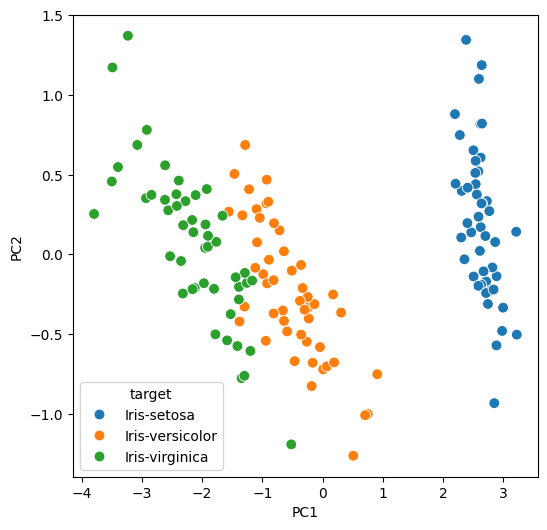

In [157]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
sb.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60)

In [158]:
print("Current shape of input data matrix: ", principal_df.shape)

Current shape of input data matrix:  (150, 3)


(571, 1000, 3)


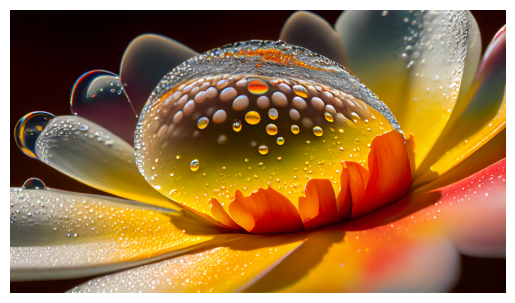

In [159]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/img.jpg')
print(img.shape)
plt.axis('off')
plt.imshow(img)

In [160]:
print("Original shape of the image:", img.shape)

Original shape of the image: (571, 1000, 3)


In [161]:
img_r = img.reshape(-1, 3)
print("New shape after flattening:", img_r.shape)

New shape after flattening: (571000, 3)


The image is reshaped from a 3D array to a 2D array,
 allowing for easier manipulation and analysis of pixel values.

In [162]:
from sklearn.decomposition import PCA
ipca = PCA(3).fit(img_r)
img_c = ipca.transform(img_r)
print("Shape after PCA transformation:", img_c.shape)

Shape after PCA transformation: (571000, 3)


 PCA is applied to reduce the dimensionality of the image data to 3 components, capturing the most significant variance in the dataset.

In [163]:
temp = ipca.inverse_transform(img_c)
temp = temp.reshape(img.shape)
print("Shape after inverse transformation:", temp.shape)

Shape after inverse transformation: (571, 1000, 3)


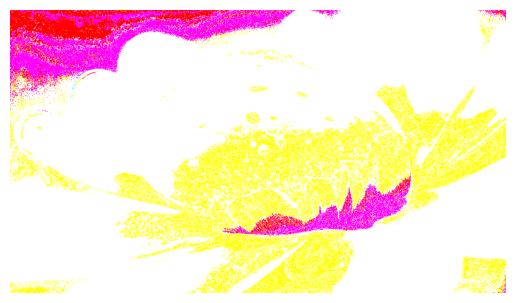

In [164]:
plt.axis('off')
plt.imshow(temp)
plt.show()

 Load the Olivetti Face Dataset

In [165]:
from sklearn.datasets import fetch_olivetti_faces
faces_data = fetch_olivetti_faces()
n_samples, height, width = faces_data.images.shape
X_faces = faces_data.data
y_faces = faces_data.target
n_features = X.shape[1]
n_classes = int(max(y) + 1)
print(f"Number of samples: {n_samples}, Height of each image: {height}, Width of each image: {width}, Number of input features: {n_features}, Number of output classes: {n_classes}")

Number of samples: 400, Height of each image: 64, Width of each image: 64, Number of input features: 5, Number of output classes: 40


In [166]:
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits."""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles is not None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

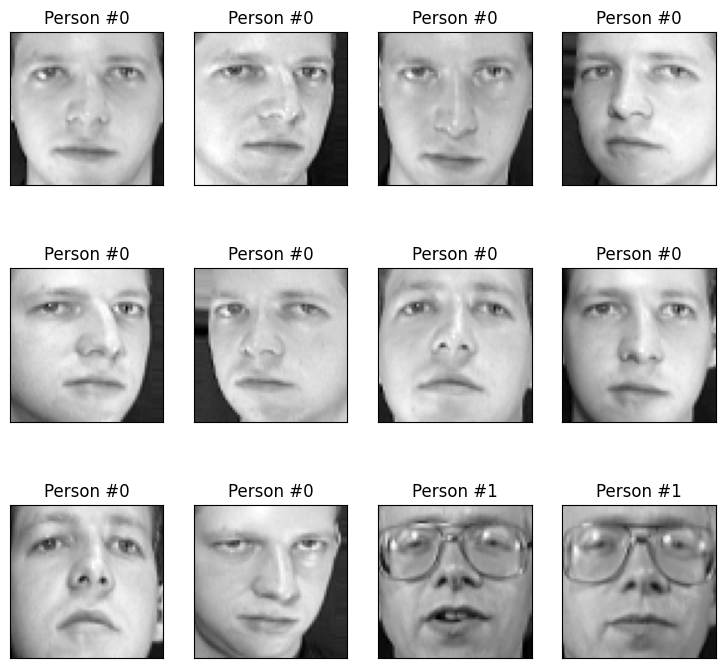

In [167]:
# Visualize some faces from the dataset
chosen_images = X_faces[:12]  # Select the first 12 images
chosen_labels = y_faces[:12]  # Select the corresponding labels
titles = [f'Person #{i}' for i in chosen_labels]
plot_gallery(chosen_images, height, width, titles)

In [168]:
n_components = 150
pca_faces = PCA(n_components=n_components, whiten=True).fit(X_faces)

In [169]:
# Find the eigenfaces
eigenfaces = pca_faces.components_.reshape((n_components, height, width))

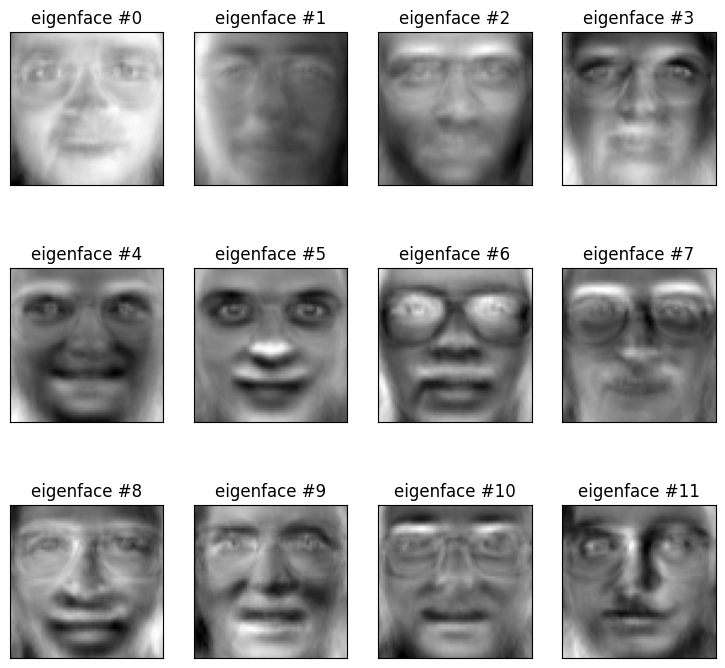

In [170]:
titles = [f'eigenface #{i}' for i in range(n_components)]
plot_gallery(eigenfaces, height, width, titles)

In [171]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_faces, y_faces, test_size=0.2, random_state=42)

 Apply Kernel PCA

In [172]:
kpca = KernelPCA(n_components=150, kernel='rbf', fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_train)

# Train a classifier (SVM) on the reduced data

In [173]:
classifier = SVC(kernel='linear')
classifier.fit(X_kpca, y_train)

SVC(kernel='linear')

#Transform the Test Set Using Kernel PCA

In [174]:
X_test_kpca = kpca.transform(X_test)

# Make predictions and evaluate the model

In [175]:
y_pred = classifier.predict(X_test_kpca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       2.0
           3       0.00      0.00      0.00       4.0
           4       0.00      0.00      0.00       3.0
           5       0.00      0.00      0.00       3.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       6.0
           8       0.00      0.00      0.00       2.0
           9       0.00      0.00      0.00       2.0
          10       0.00      0.00      0.00       2.0
          11       0.00      0.00      0.00       3.0
          12       0.00      0.00      0.00       2.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       3.0
          15       0.00      0.00      0.00       2.0
          16       0.00      0.00      0.00       0.0
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [176]:
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits."""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles is not None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#Load the dataset

In [177]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [178]:
x = data.iloc[:, 0:4]
target = data.iloc[:, 4]

In [179]:
mat_reduced = PCA2(x, 2)
principal_df = pd.DataFrame(mat_reduced, columns=['PC1', 'PC2'])

#Concatenate with Target Variable

In [180]:
principal_df = pd.concat([principal_df, pd.DataFrame(target)], axis=1)

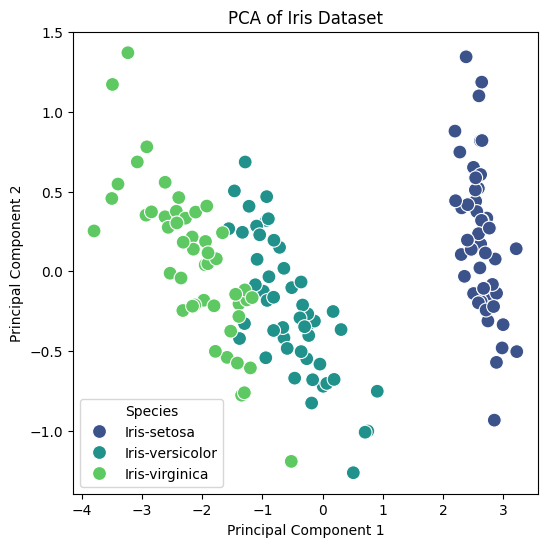

In [181]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', palette='viridis', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()